# Importing Libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from scipy.stats import yeojohnson
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.ensemble import StackingClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Discovering Our Dataset

In [2]:
df = pd.read_csv('/content/Loan_Data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.nunique()

,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


### DROPPING UNNESSCARY FEATURES

In [5]:
unused_f = ["Loan_ID"]
df.drop(columns=unused_f,inplace=True)

In [6]:
df.shape

(614, 12)

# Data Preprocessing

## Data Cleaning

### Checking for Null Values

In [7]:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


## Handeling Missing Values


In [8]:
# Handling missing values for categorical features
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Education'].fillna(df['Education'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Handling missing values for numerical features
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)


In [9]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


Some Stastical Insights

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Splitting features into numeric and categorical

In [11]:
df_num = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_cat = df.select_dtypes(include=['object']).columns.tolist()

## Data Exploration For Numeric Features

In [12]:
num_cols = len(df_num)

# Determine grid size
grid_cols = 6
grid_rows = (num_cols + grid_cols - 1) // grid_cols

# Create subplots
fig = make_subplots(rows=grid_rows, cols=grid_cols, subplot_titles=df_num)

# Add scatter plots to each subplot
for i, col in enumerate(df_num):
    row = i // grid_cols + 1
    col_num = i % grid_cols + 1
    fig.add_trace(go.Histogram(x=df[col], name=col, marker=dict(color='blue')), row=row, col=col_num)

# Update layout
fig.update_layout(height=grid_rows * 400, width=grid_cols * 400, title_text=f"Histogram Plots of Numeric Features")

fig.show()

In [13]:
target_col = 'Loan_Status'
# Number of columns to plot against the target column
num_cols = len(df_num) - 1  # excluding the target column
# Determine grid size
grid_cols = 6
grid_rows = (num_cols + grid_cols - 1) // grid_cols
# Create subplots
fig = make_subplots(rows=grid_rows, cols=grid_cols, subplot_titles=[col for col in df_num if col != target_col])
# Add scatter plots to each subplot
for i, col in enumerate(df_num):
    if col == target_col:
        continue
    row = i // grid_cols + 1
    col_num = i % grid_cols + 1
    fig.add_trace(go.Scatter(x=df[col], y=df[target_col], mode='markers', marker=dict(color='blue', line=dict(color='black', width=1))), row=row, col=col_num)
# Update layout
fig.update_layout(height=grid_rows * 400, width=grid_cols * 400, title_text=f"Scatter Plots of Numeric Features vs {target_col}")
fig.show()

##  OUTLEIRS

Check For Outliers

In [14]:
# Create subplots
fig = make_subplots(rows=grid_rows, cols=grid_cols, subplot_titles=df_num)

# Add box plots to each subplot
for i, col in enumerate(df_num):
    row = i // grid_cols + 1
    col_num = i % grid_cols + 1
    fig.add_trace(go.Box(y=df[col], name=col, marker=dict(color='blue')), row=row, col=col_num)

# Update layout
fig.update_layout(height=grid_rows * 400, width=grid_cols * 400, title_text=f"Box Plots of Numeric Features")

fig.show()


In [15]:
# Calculate number of outliers for each column
for col in df_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    num_outliers = outliers.shape[0]
    print(f"Number of outliers in {col}: {num_outliers}")


Number of outliers in ApplicantIncome: 50
Number of outliers in CoapplicantIncome: 18
Number of outliers in LoanAmount: 41
Number of outliers in Loan_Amount_Term: 102
Number of outliers in Credit_History: 89


In [16]:
# Handle outliers in ApplicantIncome (not more than 20k)
df['ApplicantIncome'] = np.where(df['ApplicantIncome'] > 20000, 20000, df['ApplicantIncome'])

# Handle outliers in CoapplicantIncome (not more than 10k)
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome'] > 10000, 10000, df['CoapplicantIncome'])

In [17]:
df['Credit_History'].unique()

array([1., 0.])

In [18]:
df['Loan_Amount_Term'].max()

480.0

In [19]:
df['Loan_Amount_Term'].min()

12.0

## Data Exploration For Categorical Features

In [20]:
for col in df_cat:
  print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Gender: ['Male' 'Female']
Unique values in Married: ['No' 'Yes']
Unique values in Dependents: ['0' '1' '2' '3+']
Unique values in Education: ['Graduate' 'Not Graduate']
Unique values in Self_Employed: ['No' 'Yes']
Unique values in Property_Area: ['Urban' 'Rural' 'Semiurban']
Unique values in Loan_Status: ['Y' 'N']


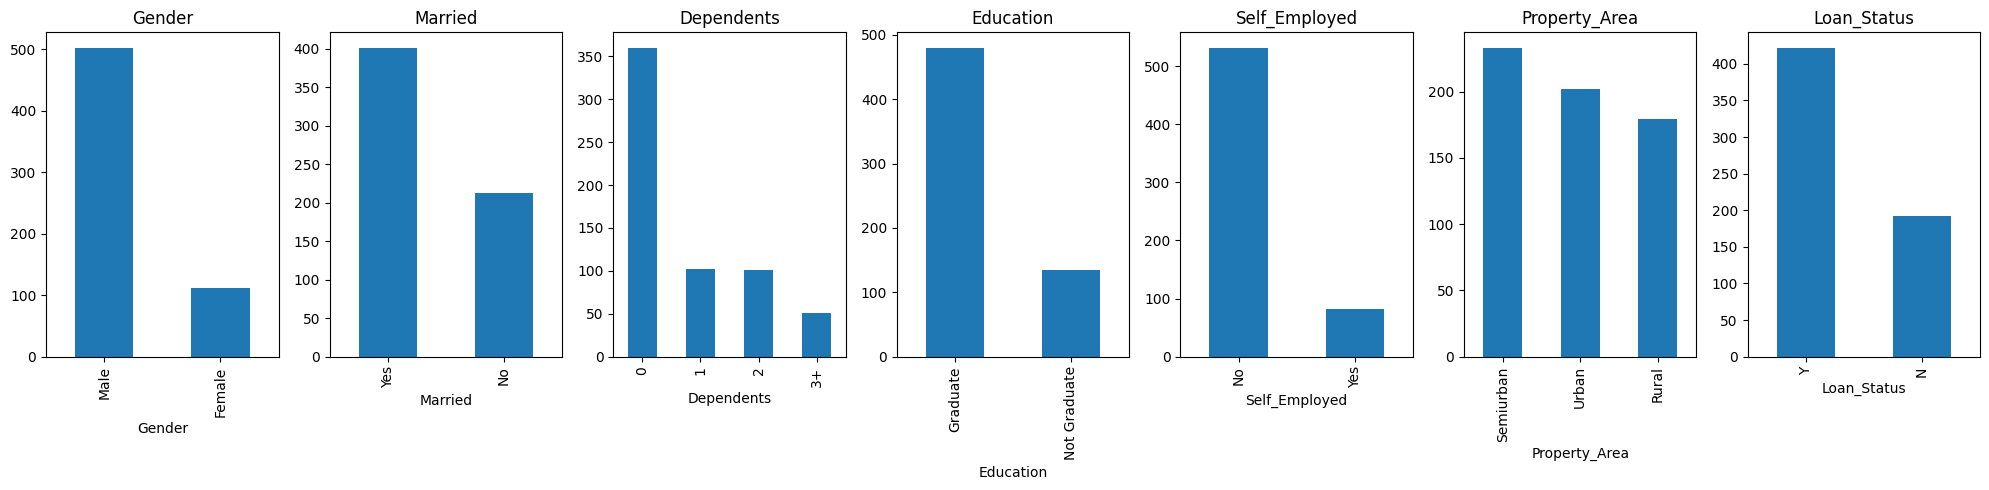

In [21]:
import matplotlib.pyplot as plt
# Plot distribution of categorical columns in one line using subplots
fig, axes = plt.subplots(1, len(df_cat), figsize=(20, 5))
for i, col in enumerate(df_cat):
    df[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
plt.tight_layout()
plt.show()


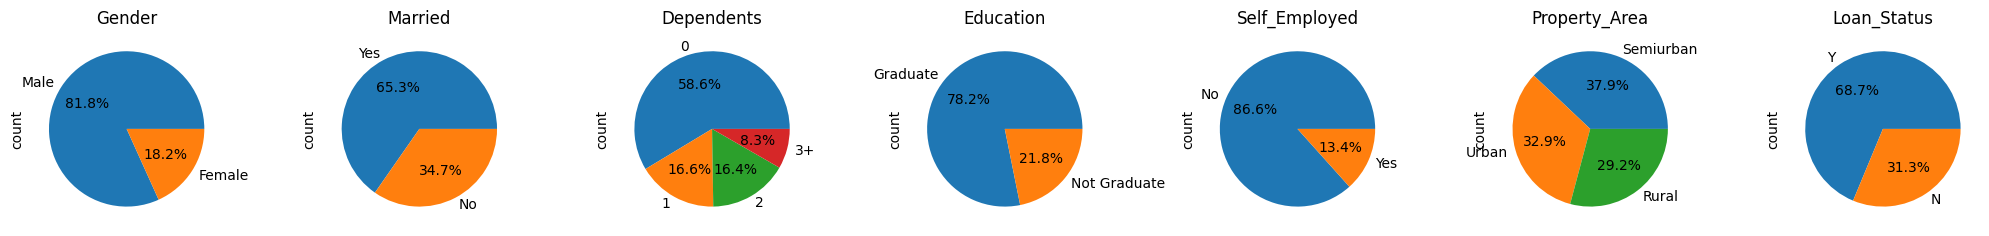

In [22]:
# Plot distribution of categorical columns in one line using subplots
fig, axes = plt.subplots(1, len(df_cat), figsize=(20, 10))
for i, col in enumerate(df_cat):
    df[col].value_counts().plot(kind='pie', ax=axes[i], title=col, autopct='%1.1f%%')
plt.tight_layout()
plt.show()


## Distribution of each Unique value With Loan_Status

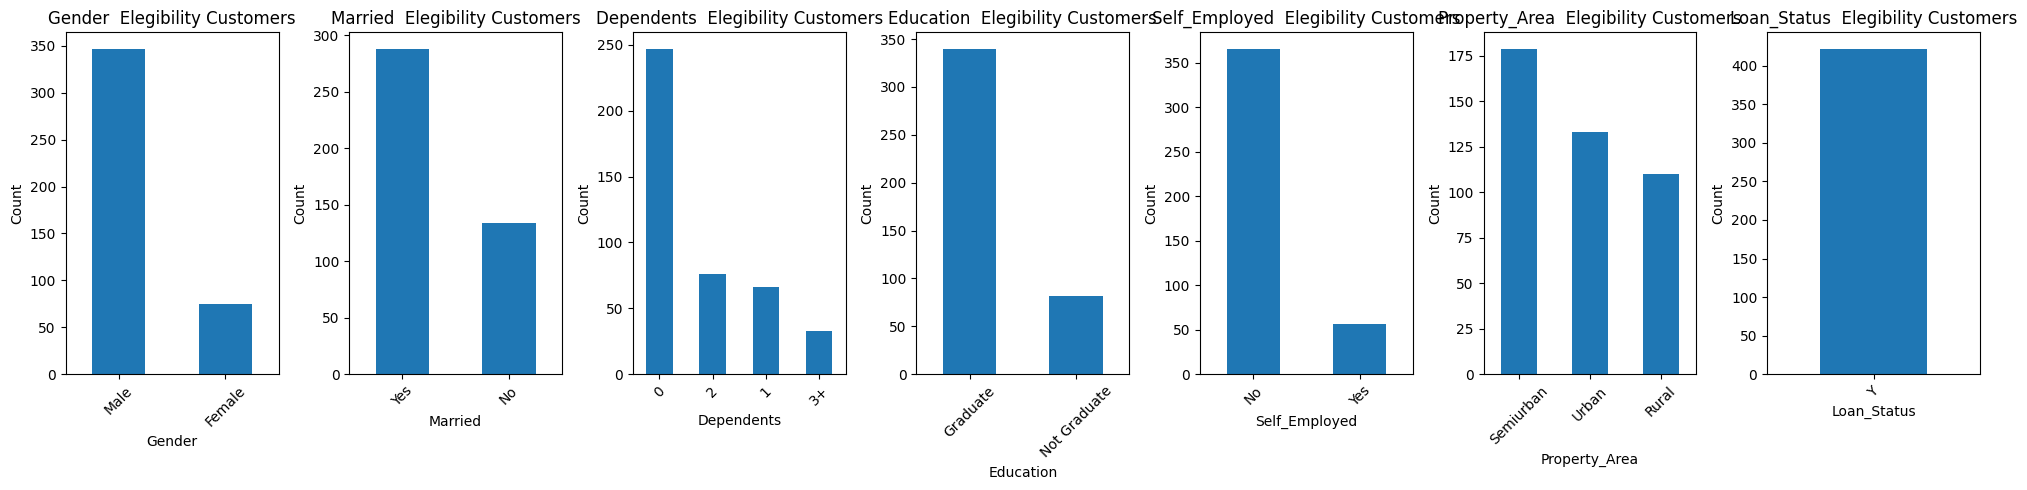

In [23]:
# Plot distribution of each unique value with Loan_Status in one line using subplots
fig, axes = plt.subplots(1, len(df_cat), figsize=(20, 5))
for i, col in enumerate(df_cat):
    df[df['Loan_Status'] == "Y"][col].value_counts().plot(kind='bar', ax=axes[i], title=f"{col}  Elegibility Customers")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


## Encoding Categorical Features

In [24]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through categorical columns and apply label encoding
for col in df_cat:
    df[col] = label_encoder.fit_transform(df[col])

# Display the updated DataFrame
df


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


## Feature Engineering

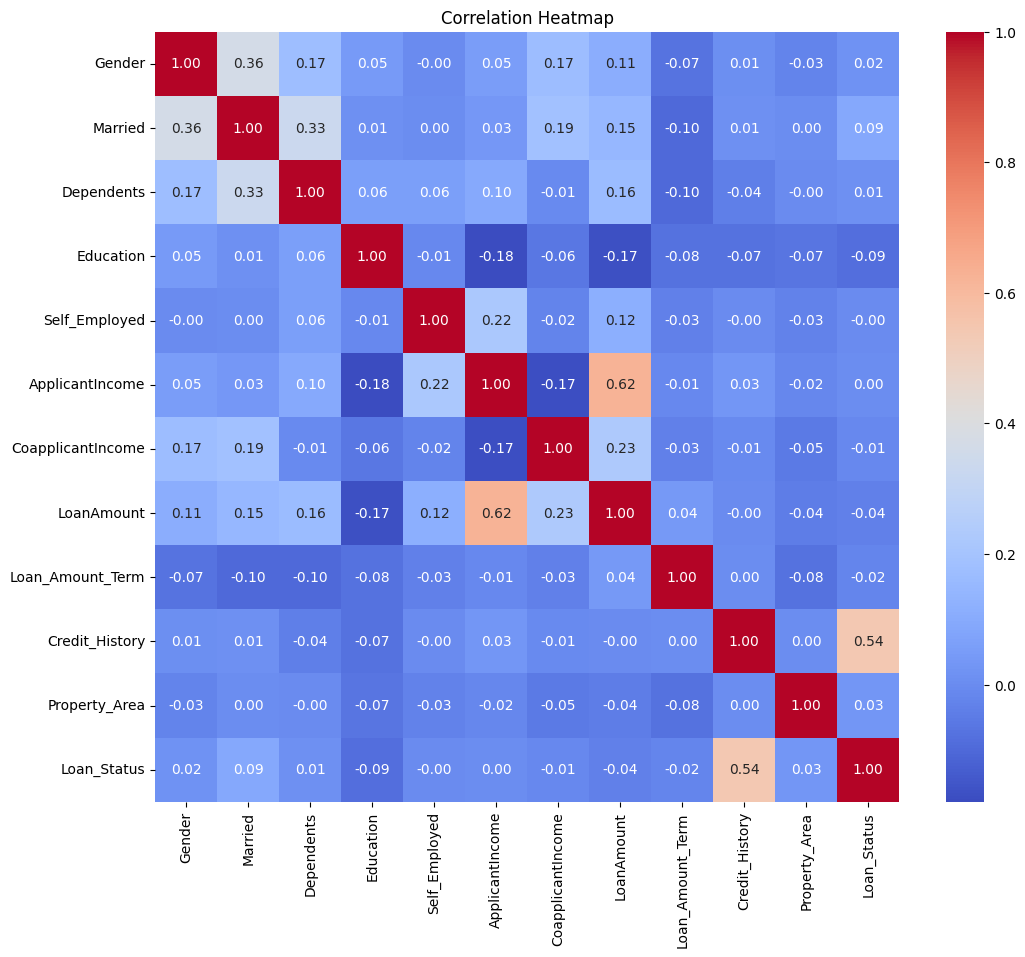

In [25]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Handeling Skewness Features

In [26]:
# Check skewness for numerical features
for col in df_num:
    skewness = skew(df[col])
    print(f"Skewness of {col}: {skewness}")

Skewness of ApplicantIncome: 2.280656156945878
Skewness of CoapplicantIncome: 1.7875797282244403
Skewness of LoanAmount: 2.719935540956202
Skewness of Loan_Amount_Term: -2.3838380001508668
Skewness of Credit_History: -2.0170275689782207


### Target Variable Distribution "Churn"

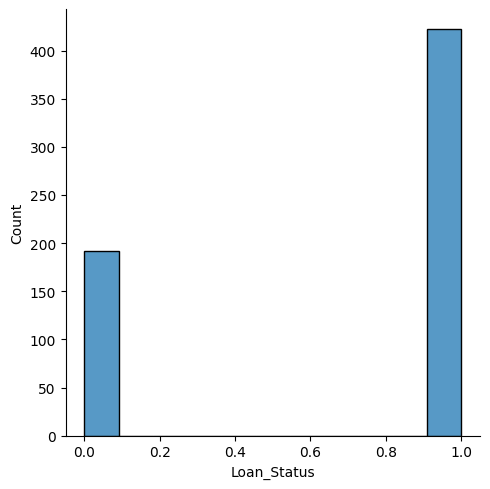

In [27]:
sns.displot(df["Loan_Status"])


##  Separate features and target variable


In [28]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [30]:
# Scaling numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Update the training and testing sets with scaled numerical features
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# Modeling

Fist Model ( Logistic Regression )


In [32]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [34]:
# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7886178861788617


## 2ND MODEL ( RFC )

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [37]:
# Evaluate the model
accuracy = rf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7642276422764228


## 3RD MODEL ( LGBM )

In [38]:
# Initialize and train the LGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 342, number of negative: 149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 374
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696538 -> initscore=0.830864
[LightGBM] [Info] Start training from score 0.830864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier()

In [39]:
# Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test)

In [40]:
# Evaluate the model
accuracy_lgb = lgb_model.score(X_test, y_test)
print(f"LGBM Accuracy: {accuracy_lgb}")

LGBM Accuracy: 0.7804878048780488


## 4TH model ( SVM )

In [41]:
# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [42]:
# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

In [43]:
# Evaluate the model
accuracy_svm = svm_model.score(X_test, y_test)
print(f"SVM Accuracy: {accuracy_svm}")

SVM Accuracy: 0.7886178861788617


## Feature Importance

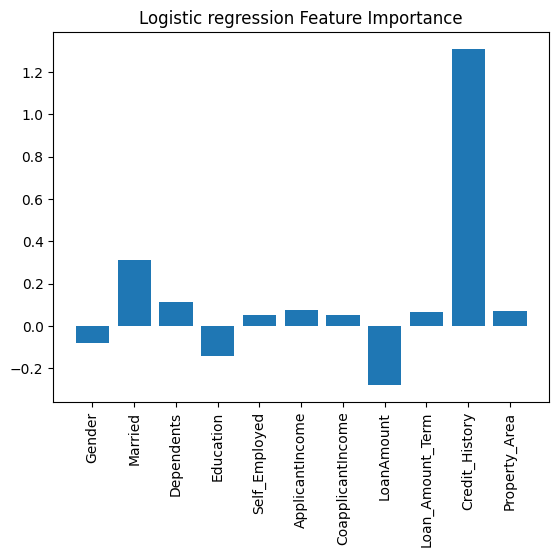

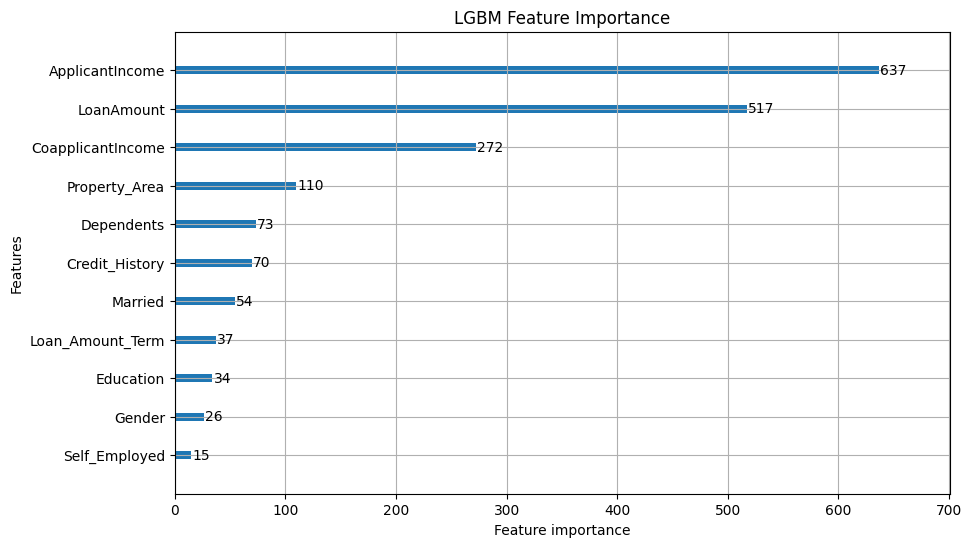

In [44]:
# Logistic Regression Feature Importance
importance = model.coef_[0]
feature_names = X_train.columns
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.title("Logistic regression Feature Importance")
plt.show()

# LGBM Feature Importance
lgb.plot_importance(lgb_model, figsize=(10, 6))
plt.title("LGBM Feature Importance")
plt.show()

# Comparison Between Models

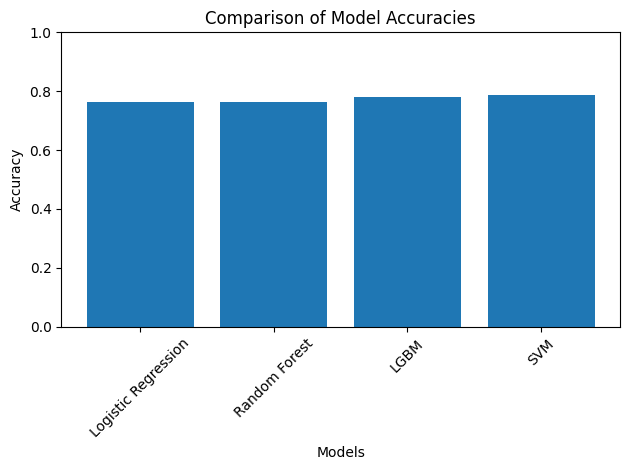

In [47]:

import matplotlib.pyplot as plt
# Model names and accuracies
models = ['Logistic Regression', 'Random Forest', 'LGBM', 'SVM']
accuracies = [accuracy, rf.score(X_test, y_test), accuracy_lgb, accuracy_svm]

# Create bar plot
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])  # Set y-axis limits for better visualization
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
data = {'Model': ['Logistic Regression', 'Random Forest', 'LGBM', 'SVM'],
        'Accuracy': [accuracy, rf.score(X_test, y_test), accuracy_lgb, accuracy_svm]}

df_comparison = pd.DataFrame(data)
df_comparison


,Model,Accuracy
0,Logistic Regression,0.764228
1,Random Forest,0.764228
2,LGBM,0.780488
3,SVM,0.788618


In [49]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier(n_estimators=100))
]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train)


StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [50]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [51]:


# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7804878048780488
